# 1. Problem description

- 목적: 수기로 씌어진 0-9까지의 숫자 이미지로부터 해당 숫자 식별 (ex. '1' > 1)



In [ ]:
# Authors: The scikit-learn developers 이 코드는 scikit-learn 개발자들이 작성했음을 나타냅니다.
# SPDX-License-Identifier: BSD-3-Clause  소스 코드의 라이선스가 BSD-3-Clause임을 명시합니다.

# Standard scientific Python imports  표준 과학 연산용 파이썬 패키지를 임포트한다는 주석입니다.
import matplotlib.pyplot as plt #데이터 시각화를 위한 matplotlib의 pyplot 모듈을 plt라는 이름으로 불러옵니다.

# Import datasets, classifiers and performance metrics 데이터셋, 분류기, 성능 평가 지표를 임포트한다는 주석
from sklearn import datasets, metrics, svm #scikit-learn에서 데이터셋 모듈, 평가 지표(metrics), SVM(서포트 벡터 머신) 분류기를 불러옵니다.
from sklearn.model_selection import train_test_split #데이터를 훈련용과 테스트용으로 나누는 함수인 train_test_split을 임포트

# 2. Digits dataset

- scikit-learn 라이브러리에서 이미지 분류 실습을 위해 제공되는 기본 데이터셋
- Image size: 8-by-8 pixel (grayscale)
- Sample 갯수: 1,797개
- Classes: 10 (0-9)
- Feature format (학습을 위한 데이터 형태): 1d array of 64 pixel values
- Target (모델의 추론 결과): 0-9 사이 정수   

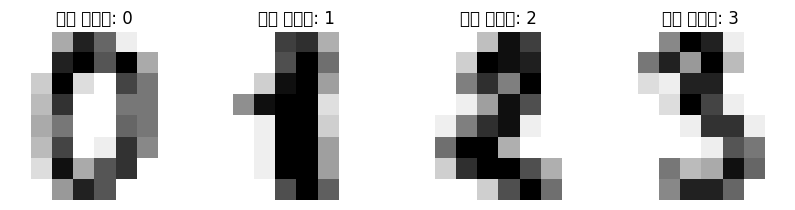

In [2]:
# 숫자 이미지 데이터셋 로드
digits = datasets.load_digits()

# 1행 4열의 서브플롯(그림 영역) 생성, 그림 크기 설정
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

# 각 축(ax), 이미지(image), 라벨(label)을 묶어서 반복
for ax, image, label in zip(axes, digits.images, digits.target):  # 일부 이미지 시현
    ax.set_axis_off()  # 축 눈금 및 테두리 제거
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")  # 이미지 표시(회색조)
    ax.set_title(f"학습 데이터: {label}")  # 각 이미지 위에 라벨(숫자) 표시 (한국어로 변경)


# 3. Classification

주어진 이미지를 0~9까지의 정수로 분류하기 위한 절차

1.   이미지를 1D array로 변환
- why? scikit-learn에서 학습 데이터는
(n_samples, n_features) 의 2차원 배열 형태
- 각 sample은 1차원 배열로 간주됨

2. 전체 데이터셋을 학습 데이터(train subsets)와 테스트 데이터(test subsets)로 구분

3. fit() method 호출 > 모델 학습

4. predict() method 호출 > 테스트 데이터를 이용한 추론



In [6]:
from sklearn import svm # Import svm here
from sklearn.model_selection import train_test_split # Import train_test_split here

# 이미지 데이터 평탄화
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))  # (샘플 수, 64) 형태로 변환

# SVM 분류기 생성
clf = svm.SVC(gamma=0.001)

# 데이터 50%씩 학습/테스트로 분할
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# 학습 데이터로 모델 학습
clf.fit(X_train, y_train)

# 테스트 데이터 예측
predicted = clf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: U

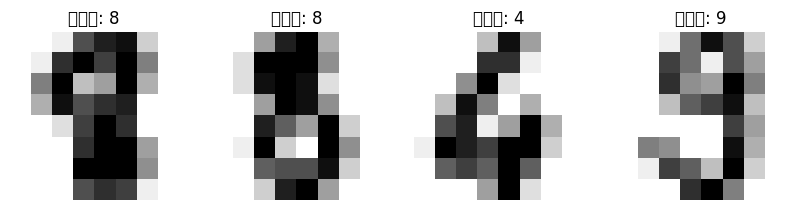

In [8]:
# 추론 결과 중 일부 시각화
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))  # 1행 4열 서브플롯 생성

# 테스트 이미지와 예측 결과를 4개만 시각화
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()  # 축 눈금 및 테두리 제거
    image = image.reshape(8, 8)  # 1차원 벡터를 8x8 이미지로 변환
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")  # 이미지 표시(회색조)
    ax.set_title(f"예측값: {prediction}")  # 예측 결과를 한글로 표시

# 4. Model Evaluation

추론 결과와 정답 데이터로부터 모델의 분류 (classification) 성능 평가

sklearn.metrics module: 모델 성능 평가를 위한 method 제공
- classification metrics: 모델이 분류를 얼마나 잘 했는가?
    - classification_report(): 분류 성능 측정 결과 출력
- regression metrics: 모델이 수치 예측을 얼마나 잘 했는가?
- clustering metrics: 모델이 군집화를 얼마나 잘 했는가?
- ...


precision, recall, f1-score, support

confusion matrix

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




- **precision, recall, f1-score**는 각 숫자(클래스)별로 산출됩니다.
- **support**는 각 숫자별 테스트 데이터 개수입니다.
- **accuracy**는 전체 테스트 데이터의 정확도입니다.
- **macro avg**는 각 클래스별 지표의 단순 평균, **weighted avg**는 클래스별 데이터 개수를 반영한 가중 평균입니다.